In [58]:
# import dependencies
import numpy as np
import csv
import matplotlib.pyplot as plt

In [59]:
# input parameters, change this section only
file_prefix="20230215-0005_"
file_num = 51
file_suffix = ".csv"
time_res = 5 * 1e-6

# average n parameter // we need to ensure total raw data points is the multiple of n
n = 5000

In [60]:
# polarization rotation speed change helper, do not change
def helper_calc(diff, delta, prev):
    return 2 * np.arcsin((1/2)*np.abs(diff - prev) ) * (1 / delta)

In [61]:
# data processing
global_diff = []
global_rot_speed = []
global_time = []
global_balance = []
global_V1 = []
global_V2 = []


for i in range(1,file_num,1):
    filename = ""
    if i < 10:
        filename = file_prefix + "0" + str(i) + file_suffix
    else:
        filename = file_prefix + str(i) + file_suffix


    with open(filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        count = 0
        for row in reader:
            if count >= 1:
                global_diff.append(float(row["abs((A-B)/(A+B))"]))
                global_balance.append(float(row["Channel C"]))
                global_V1.append(float(row["Channel A"]))
                global_V2.append(float(row["Channel B"]))
            count = count + 1

print("total number of raw data points:"+str(len(global_diff)))

for i in range(len(global_diff)):
    global_time.append(time_res*i)



total number of raw data points:10000100


In [62]:
# trim data
tot_valid_pts = int(len(global_time) / n) * n
print("number of valid raw data pts: "+str(tot_valid_pts))
global_time_arr = np.array(global_time)
global_time_arr_1 = global_time_arr[0:tot_valid_pts]
global_diff_arr = np.array(global_diff)
global_diff_arr_1 = global_diff_arr[0:tot_valid_pts]
global_balance_arr = np.array(global_balance)
global_balance_arr_1 = global_balance_arr[0:tot_valid_pts]
global_V1_arr = np.array(global_V1)
global_V1_arr_1 = global_V1_arr[0:tot_valid_pts]
global_V2_arr = np.array(global_V2)
global_V2_arr_1 = global_V2_arr[0:tot_valid_pts]

number of valid raw data pts: 10000000


In [63]:
# apply average filter
diff_avg = np.average(global_diff_arr_1.reshape(-1, n), axis=1)
t_avg = np.average(global_time_arr_1.reshape(-1, n), axis=1)
balance_avg = np.average(global_balance_arr_1.reshape(-1, n), axis=1)
V1_avg = np.average(global_V1_arr_1.reshape(-1, n), axis=1)
V2_avg = np.average(global_V2_arr_1.reshape(-1, n), axis=1)

Text(0.5, 1.0, 'Shake Plate - Run 1 - Balanced Output - Gain 1000')

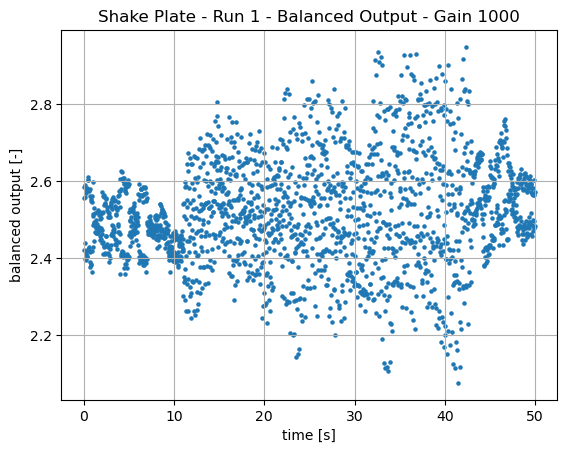

In [64]:
# Plot raw balanced out 
plt.scatter(t_avg, abs(balance_avg),s=5)
plt.grid("on")
plt.xlabel("time [s]")
plt.ylabel("balanced output [-]")
plt.title("Shake Plate - Run 1 - Balanced Output - Gain 1000")

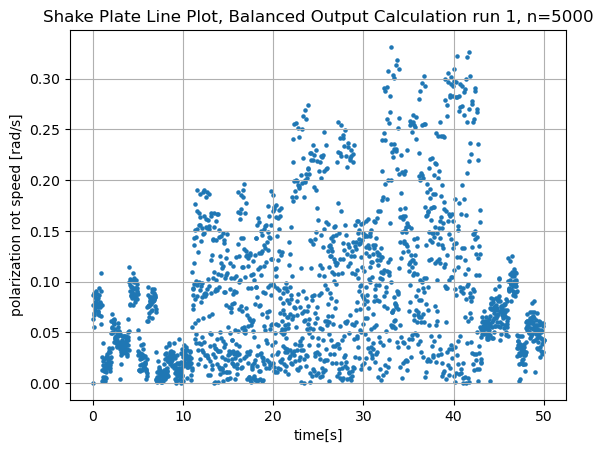

In [71]:
# Process balanced output
gain = 1000
resp = 1.04
global_balanced_diff = []
global_balanced_diff_channel = []
for i in range(len(balance_avg)):
    global_balanced_diff.append(balance_avg[i]/gain/resp)
    global_balanced_diff_channel.append(abs(balance_avg[i] / (V1_avg[i]+V2_avg[i])))

global_balanced_rot_out = []

for i in range(len(global_balanced_diff_channel)):
    prev_temp = 0.0
    if i!=0:
        global_balanced_rot_out.append(helper_calc(float(global_balanced_diff_channel[i]) , float(time_res*n), float(global_balanced_diff_channel[i-1])))
    else:
        global_balanced_rot_out.append(0.0)

plt.scatter(t_avg, global_balanced_rot_out, s=5)
plt.xlabel("time[s]")
plt.ylabel("polarization rot speed [rad/s]")
plt.title("Shake Plate Line Plot, Balanced Output Calculation run 1, n=5000")
plt.grid()
plt.show()


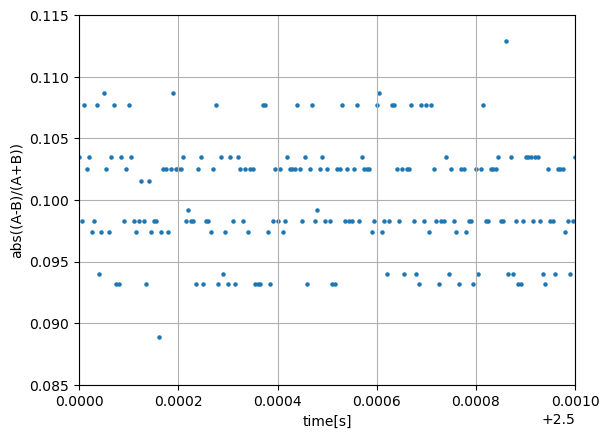

In [66]:
# plot "abs((A-B)/(A+B))" channel output, after average filter
plt.scatter(global_time_arr_1, global_diff_arr_1,s=5)
plt.xlabel("time[s]")
plt.ylabel("abs((A-B)/(A+B))")
plt.xlim(2.5000,2.5010)
plt.ylim(0.085,0.115)
plt.grid("on")
for i in range(len(diff_avg)):
    prev_temp = 0.0
    if i!=0:
        global_rot_speed.append(helper_calc(float(diff_avg[i]) , float(time_res*n), float(diff_avg[i-1])))
    else:
        global_rot_speed.append(0.0)

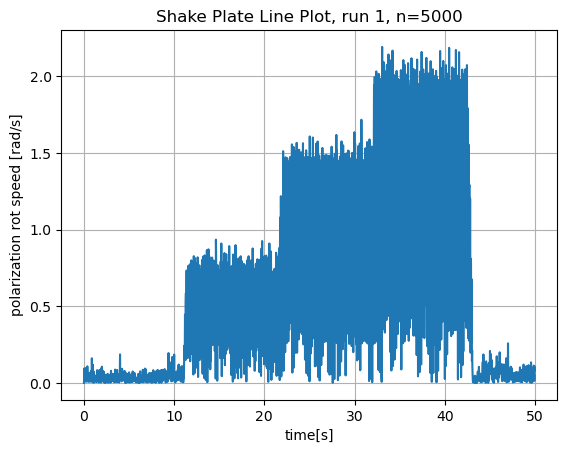

In [67]:
# Plot Line
plt.plot(t_avg, global_rot_speed)
plt.xlabel("time[s]")
plt.ylabel("polarization rot speed [rad/s]")
plt.title("Shake Plate Line Plot, run 1, n=5000")
plt.grid()
plt.show()

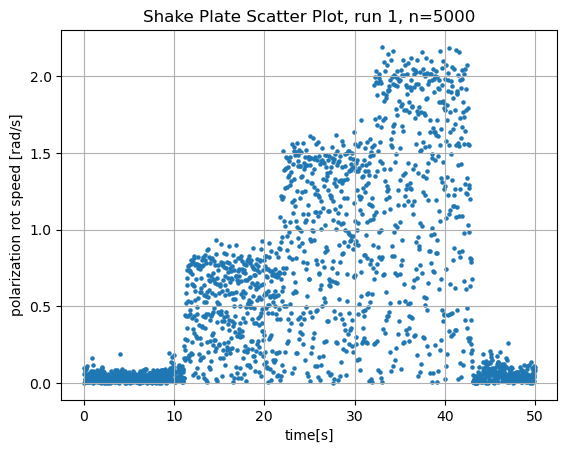

In [68]:
# Plot Scatter
plt.scatter(t_avg, global_rot_speed, s=5)
plt.grid()
plt.xlabel("time[s]")
plt.ylabel("polarization rot speed [rad/s]")
plt.title("Shake Plate Scatter Plot, run 1, n=5000")
plt.show()